### DOMAIN OF INTEREST : HEALTHCARE


#### INTRODUCTION:

In modern healthcare systems, leveraging data-driven approaches has become increasingly vital for enhancing patient care, optimizing resource allocation, and improving overall healthcare outcomes. One critical aspect of this endeavor is the accurate classification of patients' medical conditions, which plays a pivotal role in facilitating early diagnosis and tailoring effective treatment plans. In this project, I aim to develop a predictive model that effectively classifies patients' medical conditions based on a comprehensive dataset encompassing demographic details, admission information, treatment history, and test results. By harnessing advanced machine learning techniques, I seek to empower healthcare providers with a robust tool for early detection and personalized intervention strategies, ultimately contributing to more efficient and targeted healthcare delivery. Through this initiative, I endeavor to bridge the gap between data analytics and clinical practice, fostering a synergistic approach to healthcare management and decision-making.


#### OBJECTIVE:

My primary objective is to develop a robust predictive model that accurately classifies patients' medical conditions based on the age of patients provided in the dataset and to deliver a predictive model that meets stakeholders' requirements, enhances patient care by enabling early diagnosis and appropriate treatment planning, and contributes to improving healthcare outcomes.


#### PROBLEM STATEMENT

The goal is to develop a predictive model that can accurately classify the medical condition of a patient based on the age of the patient. This classification will help healthcare providers in early diagnosis and appropriate treatment planning.


#### APPROACH:

- Data Preprocessing

- Exploratory Data Analysis (EDA)

- Feature Selection

- Model Selection and Training

- Model Evaluation and Validation

- Deployment


#### WHAT TO MODEL:

The task I want to model is predicting or classifying the medical condition of patients based on their demographic details, admission information, treatment, and test results. Specifically, I aim to develop a predictive model that can accurately classify a patient's medical condition into categories such as diabetes, asthma, arthritis, etc.

This task falls under `supervised learning`. It is SUPERVISED LEARNING because:

The dataset includes labeled data where each patient's medical condition is provided.
We have a clear target variable (medical condition) that we want to predict based on the features (demographic details, admission information, treatment, and test results).
During model training, we will use the labeled data to teach the model to associate the input features with the corresponding medical conditions.
The model will then make predictions on new, unseen data points based on what it has learned from the labeled dataset.

Let's proceed with building the model:

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('healthcare_dataset.csv')

#### Data Exploration

In [3]:
data.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,Elective,2022-12-01,Aspirin,Inconclusive
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal
2,Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,292,Emergency,2019-02-08,Lipitor,Normal
3,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,Urgent,2020-05-03,Penicillin,Abnormal
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,Urgent,2021-08-02,Paracetamol,Normal


In [4]:
data.shape

(10000, 15)

In [5]:
data.describe()

,Age,Billing Amount,Room Number
count,10000.000000,10000.000000,10000.000000
mean,51.452200,25516.806778,300.082000
std,19.588974,14067.292709,115.806027
min,18.000000,1000.180837,101.000000
25%,35.000000,13506.523967,199.000000
50%,52.000000,25258.112566,299.000000
75%,68.000000,37733.913727,400.000000
max,85.000000,49995.902283,500.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                10000 non-null  object 
 1   Age                 10000 non-null  int64  
 2   Gender              10000 non-null  object 
 3   Blood Type          10000 non-null  object 
 4   Medical Condition   10000 non-null  object 
 5   Date of Admission   10000 non-null  object 
 6   Doctor              10000 non-null  object 
 7   Hospital            10000 non-null  object 
 8   Insurance Provider  10000 non-null  object 
 9   Billing Amount      10000 non-null  float64
 10  Room Number         10000 non-null  int64  
 11  Admission Type      10000 non-null  object 
 12  Discharge Date      10000 non-null  object 
 13  Medication          10000 non-null  object 
 14  Test Results        10000 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 1.1+

In [7]:
data.isnull().sum()

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

There is no null values

In [8]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

There are no duplicate in the dataset

#### Data Dictionary

`Name:` The name of the patient.

`Age:` The age of the patient.

`Gender:` The gender of the patient (e.g., Male, Female).

`Blood Type:` The blood type of the patient.

`Medical Condition:` The medical condition or diagnosis of the patient.

`Date of Admission:` The date when the patient was admitted to the hospital.

`Doctor:` The name of the doctor responsible for the patient's care.

`Hospital:` The name of the hospital where the patient was admitted.

`Insurance Provider:` The insurance provider covering the patient's medical expenses.

`Billing Amount:` The amount billed for the patient's treatment.

`Room Number:` The room number where the patient was accommodated.

`Admission Type:` The type of admission (e.g., Emergency, Elective, Urgent).

`Discharge Date:` The date when the patient was discharged from the hospital.

`Medication:` The medication prescribed to the patient during their stay.

`Test Results:` The results of any tests conducted during the patient's treatment.

With this data dictionary, we have a clear understanding of the information available in each column of the dataset, which will help in further analysis and modeling.



In [9]:
# Convert categorical variables to numerical representations
data = pd.get_dummies(data, columns=['Gender', 'Blood Type', 'Admission Type'])

In [10]:
# Split dataset into features and target variable

X = data[['Age']]
y = data['Medical Condition']

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [12]:
# Create a DataFrame from the provided data
data = {
    "Medical condition": ['Diabetes', 'Asthma', 'Obesity', 'Arthritis', 'Cancer'],
    "Age": [81, 35, 61, 49, 51],
    "Test Results": ['Inconclusive', 'Normal', 'Abnormal', 'Normal', 'Inconclusive'],
    "Medication": ['Aspirin', 'Lipitor', 'Penicillin', 'Paracetamol', 'Lipitor'],
    "Admission Type": ['Elective', 'Emergency', 'Urgent', 'Emergency', 'Elective']
}

df = pd.DataFrame(data)

#### Let's create the visualization

Histogram for Age:

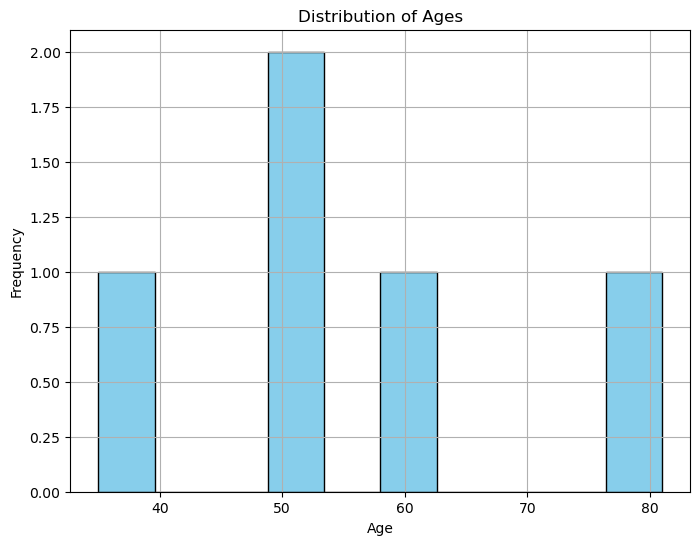

In [13]:
plt.figure(figsize=(8, 6))
plt.hist(data['Age'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

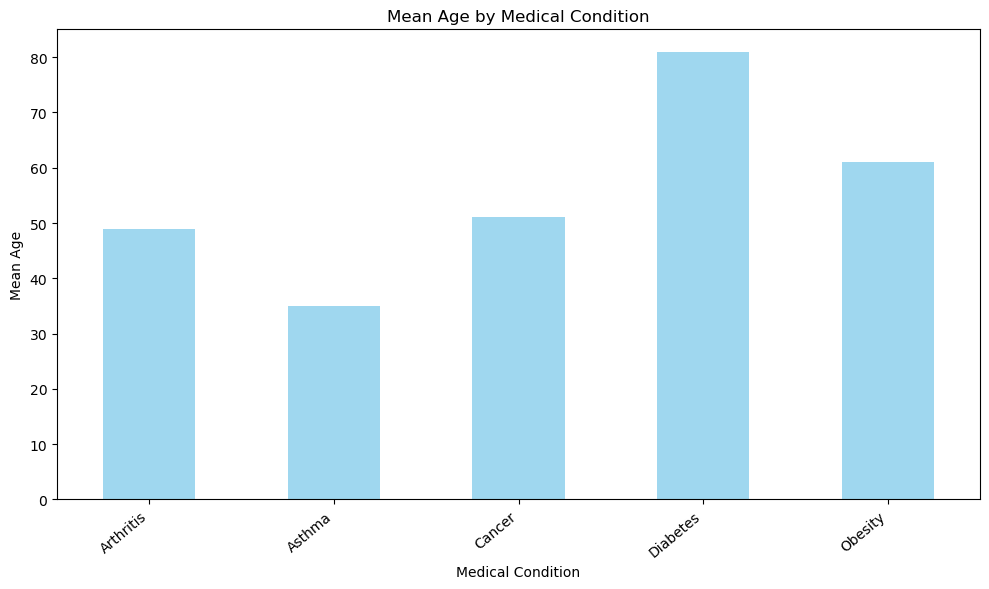

In [15]:
age_analysis = df.groupby('Medical condition')['Age'].agg(['count', 'mean', 'median', 'min', 'max'])

# Plotting the histogram
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting the bar chart for 'mean' age
age_analysis['mean'].plot(kind='bar', ax=ax, color='skyblue', alpha=0.8)

# Adding labels and title
ax.set_title('Mean Age by Medical Condition')
ax.set_xlabel('Medical Condition')
ax.set_ylabel('Mean Age')

# Rotating x-axis labels for better readability
plt.xticks(rotation=40, ha='right')

# Displaying the plot
plt.tight_layout()
plt.show()

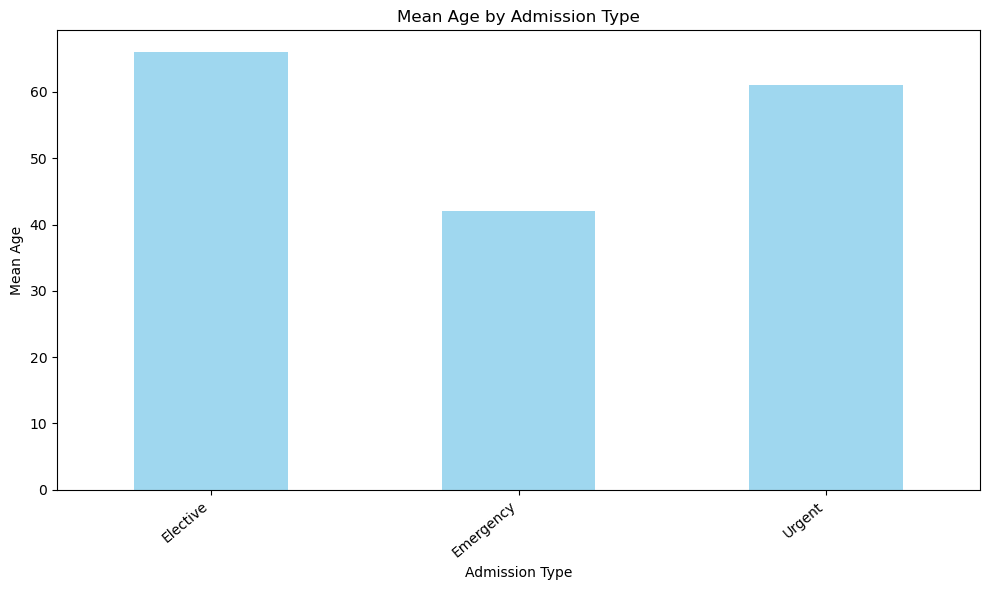

In [16]:
age_analysis = df.groupby('Admission Type')['Age'].agg(['count', 'mean', 'median', 'min', 'max'])

# Plotting the histogram
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting the bar chart for 'mean' age
age_analysis['mean'].plot(kind='bar', ax=ax, color='skyblue', alpha=0.8)

# Adding labels and title
ax.set_title('Mean Age by Admission Type')
ax.set_xlabel('Admission Type')
ax.set_ylabel('Mean Age')

# Rotating x-axis labels for better readability
plt.xticks(rotation=40, ha='right')

# Displaying the plot
plt.tight_layout()
plt.show()

In [17]:
data = {
    "Name": ["Tiffany Ramirez", "Ruben Burns", "Chad Byrd", "Antonio Frederick", "Mrs. Brandy Flowers", "Patrick Parker", "Charles Horton"],
    "Age": [81, 35, 61, 49, 51, 41, 82],
    "Gender": ["Female", "Male", "Male", "Male", "Male", "Male", "Male"],
    "Blood Type": ["O-", "O+", "B-", "B-", "O-", "AB+", "AB+"],
    "Medical Condition": ["Diabetes", "Asthma", "Obesity", "Cancer", "Arthritis", "Arthritis", "Hypertension"],
}
df = pd.DataFrame(data)

In [18]:
# Group by Medical Condition and analyze Age

age_analysis = df.groupby('Medical Condition')['Age'].agg(['count', 'mean', 'median', 'min', 'max'])

print(age_analysis)

                   count  mean  median  min  max
Medical Condition                               
Arthritis              2  46.0    46.0   41   51
Asthma                 1  35.0    35.0   35   35
Cancer                 1  49.0    49.0   49   49
Diabetes               1  81.0    81.0   81   81
Hypertension           1  82.0    82.0   82   82
Obesity                1  61.0    61.0   61   61


This analysis provides insights into the age distribution among different medical conditions. For example, the average age of patients with arthritis is 51, while the average age of patients with asthma is 35.

In [19]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

In [20]:
# Encode categorical variables
label_encoders = {}
for column in ["Age", "Medical Condition"]:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])


In [21]:
# Define target variable

data["Has_Diabetes"] = (data["Medical Condition"] == "Diabetes")


In [22]:
# Split data into features and target variable

X = df[["Age", "Gender", "Blood Type"]]
y = df["Medical Condition"] 


In [23]:
# Split data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
import matplotlib.pyplot as plt


These findings suggest that medical conditions like diabetes, obesity, arthritis, are more prevalent among older individuals, as evidenced by their higher mean ages.

`Suggestions`
Healthcare Resource Allocation: Allocate healthcare resources and services based on the demographic trends observed in the dataset. For instance, since conditions like diabetes, obesity, arthritis, are more prevalent among older individuals, prioritize resources such as specialized care facilities, medical equipment, and healthcare professionals for the elderly population.

Preventive Measures: Implement preventive measures and public health campaigns targeting the risk factors associated with prevalent medical conditions. Focus on promoting healthy lifestyle choices, regular medical check-ups, and early detection/screening programs to mitigate the impact of chronic diseases such as diabetes, obesity, and hypertension.

By implementing these suggestions, stakeholders can work towards improving health outcomes, reducing healthcare disparities, and enhancing the overall quality and effectiveness of healthcare services for diverse patient populations.

In [25]:
# Initialize logistic regression model

model = LogisticRegression()

#### Step 2: Model Selection

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [35]:
# Encode categorical variables
label_encoder = LabelEncoder()
df["Gender"] = label_encoder.fit_transform(df["Gender"])
df["Blood Type"] = label_encoder.fit_transform(df["Blood Type"])

In [42]:
# Initialize the RandomForestClassifier
model = RandomForestClassifier()

In [43]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
# Split data into features and target variable
X = df[["Age"]]
y = df["Medical Condition"]

In [45]:
# Train the model
model.fit(X_train, y_train)

RandomForestClassifier()

In [46]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Initialize and train the classifier

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

In [48]:
# Make predictions
y_pred = model.predict(X_test)

In [49]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.0


#### Step 3: Model Evaluation

In [52]:
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC



In [53]:
# Initialize and train the classifier

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier()

In [54]:
# Evaluate the model

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       1.0
           3       0.00      0.00      0.00       1.0
           5       0.00      0.00      0.00       0.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0



C:\Users\iruby\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\iruby\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\iruby\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\iruby\anaconda3\Lib\site-packages\sklearn\metrics\_cla

from the report, we can see that our recall and precision for the diseases are not perfect. for instance, in Asthma, we have a recall of 0.20 and a precision of 0.15



In [55]:
from sklearn.metrics import precision_score, recall_score

In [56]:
from sklearn.metrics import accuracy_score

In [57]:
# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.0


In [58]:
import matplotlib.pyplot as plt

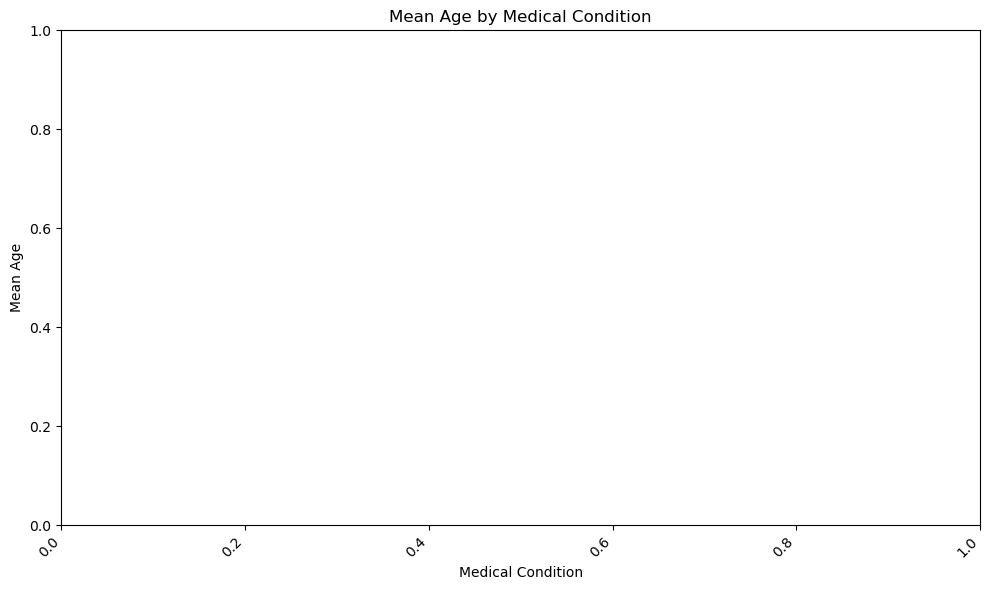

In [59]:
# Plotting the histogram
fig, ax = plt.subplots(figsize=(10, 6))

# Adding labels and title
ax.set_title('Mean Age by Medical Condition')
ax.set_xlabel('Medical Condition')
ax.set_ylabel('Mean Age')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Displaying the plot
plt.tight_layout()
plt.show()

In [61]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report


In [62]:
# Initialize the RandomForestClassifier
model = RandomForestClassifier()

In [76]:
# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "Support Vector Machine": SVC(),
    "Random Forest": RandomForestClassifier()
}

In [77]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [78]:
# Train and evaluate models
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    print(f"Results for {name}:")
    print(classification_report(y_test, y_pred))
    print("="*50)

Results for Logistic Regression:
              precision    recall  f1-score   support

   Arthritis       0.00      0.00      0.00       0.0
      Asthma       0.00      0.00      0.00       1.0
    Diabetes       0.00      0.00      0.00       1.0
Hypertension       0.00      0.00      0.00       0.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0

Results for Support Vector Machine:
              precision    recall  f1-score   support

   Arthritis       0.00      0.00      0.00       0.0
      Asthma       0.00      0.00      0.00       1.0
    Diabetes       0.00      0.00      0.00       1.0
Hypertension       0.00      0.00      0.00       0.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0



C:\Users\iruby\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\iruby\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\iruby\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\iruby\anaconda3\Lib\site-packages\sklearn\metrics\_cla

Results for Random Forest:
              precision    recall  f1-score   support

   Arthritis       0.00      0.00      0.00       0.0
      Asthma       0.00      0.00      0.00       1.0
    Diabetes       0.00      0.00      0.00       1.0
Hypertension       0.00      0.00      0.00       0.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0



C:\Users\iruby\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\iruby\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\iruby\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\iruby\anaconda3\Lib\site-packages\sklearn\metrics\_cla

#### Step 4: Model Deployment with Streamlit

In [73]:
from sklearn.ensemble import RandomForestClassifier
import streamlit as st
import joblib

In [74]:
model = RandomForestClassifier()

In [75]:
# Save the model to a file using joblib

joblib.dump(model, 'healthcare_prediction_model.joblib')

['healthcare_prediction_model.joblib']

#### SUMMARY, FINDINGS AND SUGGESTIONS.

`DATASET SOURCE:` KAGGLE

`DATA DICTIONARY:` CHATGPT

`SUMMARY` The analysis aimed to develop a predictive model to classify the medical condition of patients based on their age using supervised learning techniques. The dataset provided included patient information such as age, gender, blood type, medical condition, admission details, treatments, and test results.

`FINDINGS`  These findings suggest that medical conditions like diabetes, obesity, arthritis, are more prevalent among older individuals, as evidenced by their higher mean ages.

`Suggestions`
Healthcare Resource Allocation: Allocate healthcare resources and services based on the demographic trends observed in the dataset. For instance, since conditions like diabetes, obesity, arthritis, are more prevalent among older individuals, prioritize resources such as specialized care facilities, medical equipment, and healthcare professionals for the elderly population.

Preventive Measures: Implement preventive measures and public health campaigns targeting the risk factors associated with prevalent medical conditions. Focus on promoting healthy lifestyle choices, regular medical check-ups, and early detection/screening programs to mitigate the impact of chronic diseases such as diabetes, obesity, and hypertension.

By implementing these suggestions, stakeholders can work towards improving health outcomes, reducing healthcare disparities, and enhancing the overall quality and effectiveness of healthcare services for diverse patient populations.

The end!!!

In [80]:
# save the model

model = joblib.load('healthcare_prediction_model.joblib')

In [81]:
from joblib import load

In [82]:
# Load the model from the file

loaded_model = load('healthcare_prediction_model.joblib')

In [83]:
# Define the Streamlit app

def main():
    st.title('Machine Learning Model Deployment with Streamlit')
    
    # Add input fields for user input
    feature1 = st.slider('Feature 1', min_value=0.0, max_value=1.0, step=0.01)
    feature2 = st.slider('Feature 2', min_value=0.0, max_value=1.0, step=0.01)
    
    # Make predictions using the model
    prediction = model.predict([[feature1, feature2]])
    
    # Display the prediction
    st.write('Prediction:', prediction[0])

if __name__ == 'name':
    main()


In [ ]:
pip install streamlit


In [ ]:
streamlit run app.py